# **第15章 k-最近傍法**

## **レシピ15.0 はじめに**
　k-最近傍法(KNN:k-Nearest Neighbors)クラス分類器は、教師あり機械学習クラス分類器の中で、最も単純だが、最も広く用いられている手法だ。KNNは遅延学習器(lazy learner)の1つで、予測のための訓練を行わない。観測値は、周辺にあるk個の観測値の多数が占めるクラスであると予測される。例えば、クラスの分からないある観測値が、クラス1の観測値に囲まれていた場合には、クラス1に分類する。本章では、scikit-learnを使ってKNNクラス分類器を作成し、利用する方法を説明する。

## **レシピ15.1 観測値の近傍の発見**

### **問題**
　ある観測値に対して、最も近くにある観測値(最近傍値)をk個見つけたい。

## **解決策**
　scikit-learnの**NearestNeighbors**を用いる。

In [1]:
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# データをロード
iris = datasets.load_iris()
features = iris.data # 特徴量を抽出

# 標準化器を作成
standardizer = StandardScaler()

# 特徴量を標準化
features_standardized = standardizer.fit_transform(features)

# 2-最近傍法(距離の近い点を2つ見つける) k = n_neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2).fit(features_standardized)

# 観測値を作成(生データの場合、標準化する必要あり)
new_observation = [ 1,  1,  1,  1]

# 最近傍の観測値の距離とインデックスを計算
distances, indices = nearest_neighbors.kneighbors([new_observation])

# 最近傍点を表示
features_standardized[indices]

array([[[1.03800476, 0.55861082, 1.10378283, 1.18556721],
        [0.79566902, 0.32841405, 0.76275827, 1.05393502]]])

In [0]:
from pandas import DataFrame

# 説明変数と目的変数を結合
df = DataFrame(features, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### **議論**
　ここでは、データセットとしてIrisを用いた。新しい観測値**new_observation**を作り、これに最も近い観測値を2つ見つけている。indecesは、データセット内での近傍値のインデックスを表している。したがって、X[indeices]とすると、観測点を表示することが出来る。直感的には、観測点間の距離は類似度を表している。したがって、最近傍である2つの花は、新たに作成した花に最も似た花であったといえる。  
　では、距離をどのように測ればいいのだろうか？  
　scikit-learnは、様々な距離計量dを提供している。例えばユークリッド距離は以下のように定義される。
$$d_{euclidean}=\sqrt{\sum^{n}_{i=1}(x_i-y_i)^2}$$
　マンハッタン距離は下記のように定義される。
$$d_{manhattan}=\sum^{n}_{i=1}|x_i-y_i|$$
　**NearestNeighbors**でフォルトでは、ミンコフスキー(Minkowski)距離を用いる。
$$d_{manhattan}=(\sum^{n}_{i=1}|x_i-y_i|^p)^{\frac{1}{p}}$$
　ここで、$x_i$と$y_i$は、距離を計算する観測値の個々の特徴量の値だ。ミンコフスキー距離にはハイパーパラメータ$p$があり、$p=1$のときマンハッタン距離に、$p=2$のときユークリッド距離に相当する。scikit-learnのデフォルト値は、$p=2$となっている。  
　距離計量は**metric**パラメータで指定する。

In [0]:
# ユークリッド距離を用いて最初の2つの最近傍点を見つける
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=2, metric='euclidean').fit(features_standardized)

　全ページで作った変数**distance**には、2つの最近傍値との実際の距離が格納されている。

In [0]:
# 距離を表示
distances

array([[0.49140089, 0.74294782]])

　さらに、**kneighbors_graph**を用いて個々の観測値に対する最近傍点を示す行列を作ることができる。

In [0]:
# 意味
# ユークリッド距離を用いて、最近傍点を3つ(自身を含む)見つける
nearestneighbors_euclidean = NearestNeighbors(n_neighbors=3, metric="euclidean").fit(features_standardized)

# それぞれの観測値に対する3つの最近傍点(自身を含む)を表すリストのリストを作成
nearest_neighbors_with_self = nearestneighbors_euclidean.kneighbors_graph(features_standardized).toarray()

# 自分自身を指している近傍点を削除
for i, x in enumerate(nearest_neighbors_with_self):
    x[i] = 0

# 最初の観測値の2つの最近傍点を表示
nearest_neighbors_with_self[0]

# nearest_neighbors_with_selfで150個の要素全てに対して、最近傍の点3つを求め、それを1とし、それ以外を0としてリストを作成する。最終的に形状(150, 150)となる
# その後のfor文で自分自身のインデックスを0に戻すことを行っている。例えば、nearest_neighbors_with_self[0]は形状(1,150)となっており、nearest_neighbors_with_self[0][0]は1が立っている。
# 同様にnearest_neighbors_with_self[1][1]にも1が立っており、nearest_neighbors_with_self[i][i]に1が立っている。これは自分自身なので0に戻している
# 最後のnearest_neighbors_with_self[0]で観測値の最初(0行目)の最近傍となるインデックスを表示させている。

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [0]:
import numpy as np
# それぞれの観測値に対する3つの最近傍点(自身を含む)を表すリストのリストを作成
# np.set_printoptions(threshold=1000000)
nearestneighbors_euclidean.kneighbors_graph(features_standardized).toarray()

NameError: ignored

In [0]:
len(nearestneighbors_euclidean.kneighbors_graph(features_standardized).toarray())

150

In [0]:
# 自分自身を指している近傍点を削除
for i, x in enumerate(nearest_neighbors_with_self):
    x[i] = 0

# 最初の観測値の2つの最近傍点を表示
nearest_neighbors_with_self[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

　最近傍点を見つけたり、距離に基づく学習アルゴリズムを使う場合には、特徴量が同じスケールになるように変換しておくことが重要だ。これは、全ての特徴量が同じスケールにあることを、距離計量が前提としているからだ。もし、ある特徴量が100万ドルのスケールで、もう一つの特徴量がパーセント値だったりすると、距離が前者の特徴量に引きずられてします。ここでは、**StandardScaler**を用いて特長量を標準化することでこの潜在的な問題を回避している。

## **レシピ15.2 k-最近傍法クラス分類器の作成**
### **問題**
　クラスが未知の観測値に対して、その近傍にある観測値に基づいてクラスを予測したい。

### **解決策**
　データセットがあまり大きくなければ、**KNeighborsClassifier**を用いる。

In [2]:
# ライブラリをロード
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# データをロード
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 標準化器を作成
standardizer = StandardScaler()

# 特徴量を標準化
X_std = standardizer.fit_transform(X)

# 近傍値数を5に指定してKNNクラス分類器を訓練
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_std, y)

# 2つの観測値を作成
new_observations = [[ 0.75,  0.75,  0.75,  0.75],
                    [ 1,  1,  1,  1]]

# 2つの観測値のクラスを予測
knn.predict(new_observations)

## レシピ15.01だと距離を求めるだけでしたが、ここでは予測まで出来ました

array([1, 2])

### **議論**
　KNNでは、ターゲットクラスが未知の観測値$x_u$に対して、まず、何らかの距離計量(ユークリッド距離など)で最も近くにある観測値をk個見つけだし、(これらを$x_u$の近傍値と呼ぶ)、次に、このk個の観測値のクラスで「投票」を行い、最も多かったクラスを対象となる観測値のクラスと定める。数式で書くと、$x_u$がクラス$j$に属する確率は次のようになる。
$$\frac{1}{k}\sum_{i\in \nu}I(y_i=j)$$
　ここで、$\nu$は$x_u$の近傍にあるk個の観測値で、$y_i$はi番目の観測値のクラス、$I$は指示関数(indicator function：真のときには1を、偽の時には0を取る関数)である。scikit-learnでは、これらの確率を**predict_proba**で見ることが出来る。

In [0]:
# それぞれの観測値が3つのクラスに属する確率を表示
knn.predict_proba(new_observations)

array([[0. , 0.6, 0.4],
       [0. , 0. , 1. ]])

　最も高い確率を持つクラスが、予測されるクラスとなる。例えば、上の出力では最初の観測値はクラス1に($P_r=0.6$)、2つ目の観測値はクラス2($P_r=1$)に分類される。

In [0]:
knn.predict(new_observations)

array([1, 2])

　**KNeighborsClassifier**には重要なパラメータがたくさんある。1つ目は**metric**で、使用する距離計量を指定する。(これについては「**レシピ15.1 観測値の近傍の発見**」で詳しく説明した)。2つ目は**n_jobs**で、使用するコア数をする。予測を行うには、データセット中の全ての観測値との距離を計算しなければならないので、複数のコアを使った方がいい。3つ目は**algorithm**で、最近傍点を計算するためのアルゴリズムを指定する。実際、アルゴリズムの動作をそれぞれ異なるのだが、デフォルトで最良のアルゴリズムを自動的に選択するようになっているので、多くの場合はこのパラメータを設定する必要はない。4つ目は**weights**だ。デフォルトでは**KNeightborsClassifier**は上で説明したように、個々の近傍観測値が1票ずつ投票するのだが、**weights**パラメータを**distance**に設定すると、近い観測値の投票に対して、遠い観測値の投票よりもより大きい重みを付けるようになる。これは直感的にも理解できるだろう。対象となる観測値により近い観測値に、遠い観測値よりも強い発言力を与えるのだ。  
　最後に、**レシピ15.1**で説明したように、距離計量は全ての特徴量が同じスケールになっていることを前提にしているので、KNNクラス分類器にかける前に、特徴量を標準化しておくことが重要だ。

# **Irisデータの可視化**
* 2つの特徴量(2D)のプロット
* 3つの特徴量(3D)のプロット
* 4つの特徴量(4D)はプロット不可

Text(0.5, 0, 'petal width (cm)')

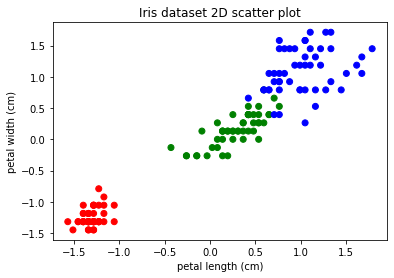

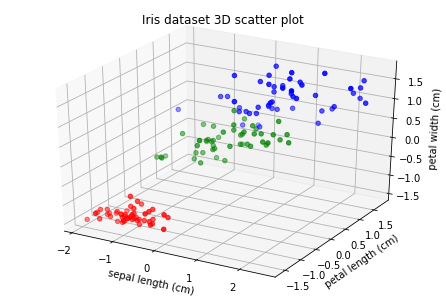

In [0]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データをロード
iris = datasets.load_iris()
features = iris.data

# 標準化器を作成
standardizer = StandardScaler()

# print(iris.feature_names) # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = features_standardized[:,0] # sepal length (cm)
Y = features_standardized[:,2] # petal length (cm)
Z = features_standardized[:,3] # petal width (cm)
color = ['red', 'green', 'blue'] # 各品種で色分け

# 2次元散布図(petal length (cm) と petal width (cm))
plt.scatter(Y, Z, c=[color[x] for x in iris.target])
plt.title("Iris dataset 2D scatter plot")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

# 3次元散布図(sepal length (cm) と petal length (cm) と petal width (cm))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X,Y,Z, c=[color[x] for x in iris.target])

ax.set_title("Iris dataset 3D scatter plot")
ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("petal length (cm)")
ax.set_zlabel("petal width (cm)")